# <center> Raíces </center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc

Encontrar raíces en escencia es el fundamento más importante para desarrollar y solucionar problemas matemáticos. 
Estamos buscando entonces qué $x$ cumplen que 
$$F(x)=0$$

A pesar de que la ecuación no tenga una solución analítica, podemos aproximar las soluciones mediante diversas estrategias:


# Método de Bisección 


Éste es con seguridad el método más sencillo, simplemente ir partiendo por mitades. En este sentido, el algoritmo puede ser descrito como:


1. Buscar un intervalo en que haya cambio de signo con $f(a)\cdot f(b)<0$
2. Calcular el punto medio del intervalo $m=\frac{a+b}{2}$
3. Buscar si el cambio de signo quedó a la izquierda o a la derecha de $m$
4. Actualizar $a$ o $b$ con base a 3. 
5. Repetir hasta que $|a-b|<\epsilon$
6. Retornar el punto medio.

### Error asociado 
Si tuvimos que repetir $N$ iteraciones del algoritmo anterior y en efecto el cambio de signo existe, podemos escribir que el error es: 
$$\varepsilon=\left| \ x_{\text{verdadero}} - x_N \, \right| \leq \frac{b-a}{2^{N+1}}$$
### Implementación 

In [ ]:
def bisection(f,a,b,N):
    '''Método de bisección

    Parametros
    ----------
    f : función objetivo (PASAR EN FORMA DE FUNCION LAMBDA)
    a,b : Intervalo para buscar ua solución
    N : Número máximo de iteraciones.

    Returns
    -------
    x_N : punto medio del último intervalo
    '''
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Solucion encontrada")
            return m_n
        else:
            print("No hallada la solución")
            return None
    return (a_n + b_n)/2

# Método de la Secante

Es relativamente parecido al método de la secante. La diferencia fundamental radica en que ahora buscamos la intersecciónd del eje con la secante entre los dos puntos del intervalo.

Se puede demostrar que si $f(x)$ es continua y $f(x)=0$ en el intervalo dado $[a,b]$ el algoritmo va a converger a ella.

El pseudo-algo de este modelo es: 

1. Encontrar un intervalo $[a,b]$ tal que $f(a_0)f(b_0) < 0$
2. Calcular la intersecciónde la línea secante con $x_0 = a_0 - f(a_0)\frac{b_0 - a_0}{f(b_0) - f(a_0)}$
3. Ver si el cambio de signo está a la derecha o a la izquierda de $x_0$
4. Actualizar los límites con base al resultado anterior
5. Repetir $N$ veces hasta que $|a-b|<\epsilon$
6. Retornar $x_0$
### Implementación 

In [2]:
def secant(f,a,b,N):
    '''Solución aproximada por el método de la secante

    Parametros
    ----------
    f : función objetivo (PASAR EN FORMA DE FUNCION LAMBDA)
    a,b : Intervalo para buscar ua solución
    N : Número máximo de iteraciones.


    Returns
    -------
    m_N :Solución aproximada

    '''
    if f(a)*f(b) >= 0:
        print("No se encuentra cambio de signo ")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("x Encontrada")
            return m_n
        else:
            print("Solución no encontrada")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

# Método Newton-Raphson

Esta es una aproximación lineal, tal vez de las estrategias más rápidas. En particular, debemos partir de una estimación $x_0$ y usamos la pendiente para converger al intercepto. 

A pesar de que el método es tan rápido en la convergencia, tiene una desventaja muy grande: No garantiza convergencia para cuando hay un cero en el intervalo indicado; además, como se necesita calcular la derivada, la optimización en tiempo de cálculo depende de la complejidad de la derivada. 

### Implementación 



In [ ]:
def newton(f,Df,x0,epsilon=1e-10,max_iter=15):
    '''Aproximación a la solución con el método Newton-Raphson 

    Parámetros
    ----------
    f : Función objetivo (PASAR COMO FUNCIÓN LAMBDA)
    Df : Derivada de la función f(x). (PASAR COMO FUNCIÓN LAMBDA)
    x0 : aproximación inicial a la solución.
    epsilon : Tolerancia de la solución. Por default= 1e-10
    max_iter : Número máximo de iteraciones. Por default=15

    Retorna
    -------
    xn : Solución aproximada (Float) O (None) si no encuentra la solución.

    '''
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Solución encontrada en ',n,'Iteraciones')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('No converge')
            return None
        xn = xn - fxn/Dfxn
    print('No converge')
    return None

## Comparación 

En general, podemos ver que en caso de convergencia la aproximación  para los tres métodos es parecida: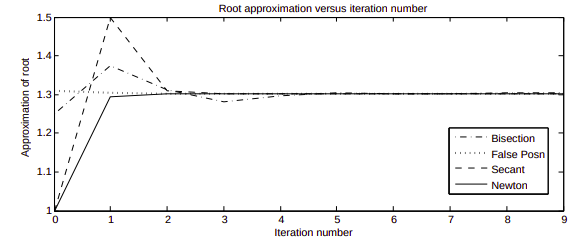

No obstante, si se analiza el error porcentual, se nota que el método de Newton es bastante más rápido en converger que los demás: 
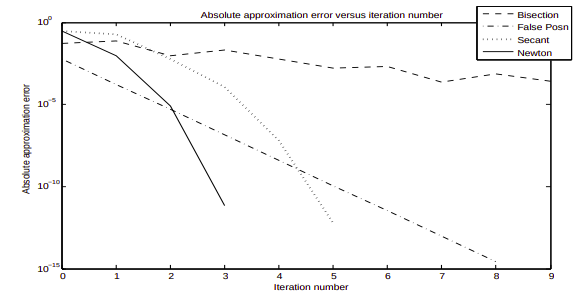

# No Inventar la Rueda

Como vemos, estos métodos son sencillos pero un poco rudimentarios, por esta razón conviene usar SciPy con el método brentq que utiliza el método de brent (converge a una taza lineal). 

```
raiz = sc.optimize.brentq(f, a, b)
```

Esta función retorna como float la raíz de la función $f$ (en forma de función lambda) en el intervalo $[a,b]$